In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import date

In [32]:
df = pd.read_json(r'channel_messages.json', encoding='utf8')
df.head()

,_,id,peer_id,date,message,out,mentioned,media_unread,silent,post,...,views,forwards,replies,edit_date,post_author,grouped_id,reactions,restriction_reason,ttl_period,action
0,Message,1905,"{'_': 'PeerChannel', 'channel_id': 1446867812}",2024-04-12 14:42:27+00:00,Текст приказа,False,False,False,False,True,...,8537.0,71.0,"{'_': 'MessageReplies', 'replies': 23, 'replie...",2024-04-12T14:43:34+00:00,None,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],NaN,NaN
1,Message,1904,"{'_': 'PeerChannel', 'channel_id': 1446867812}",2024-04-12 14:37:30+00:00,С 2025-2026 учебного года в 6-8-ом классах из ...,False,False,False,False,True,...,11016.0,719.0,"{'_': 'MessageReplies', 'replies': 346, 'repli...",2024-04-12T14:37:39+00:00,None,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],NaN,NaN
2,Message,1903,"{'_': 'PeerChannel', 'channel_id': 1446867812}",2024-04-12 13:30:28+00:00,Сейчас будет максимально загадочно. Это намере...,False,False,False,False,True,...,8835.0,22.0,"{'_': 'MessageReplies', 'replies': 69, 'replie...",2024-04-12T13:33:05+00:00,None,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],NaN,NaN
3,Message,1902,"{'_': 'PeerChannel', 'channel_id': 1446867812}",2024-04-12 09:02:06+00:00,Какую специальность выбрать? \n\nЕсли твоя меч...,False,False,False,True,True,...,9036.0,9.0,"{'_': 'MessageReplies', 'replies': 3, 'replies...",2024-04-12T09:02:17+00:00,None,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],NaN,NaN
4,Message,1901,"{'_': 'PeerChannel', 'channel_id': 1446867812}",2024-04-12 07:52:01+00:00,«Новые люди» вынесли на рассмотрение законопр...,False,False,False,False,True,...,9148.0,32.0,"{'_': 'MessageReplies', 'replies': 85, 'replie...",2024-04-12T07:52:12+00:00,None,NaN,"{'_': 'MessageReactions', 'results': [{'_': 'R...",[],NaN,NaN


In [34]:
df['date'] = df['date'].dt.date

Ограничение по дате

In [35]:
df = df.where(df['date'] >= date.fromisoformat('2021-01-01'))

In [36]:
df = df.sort_values(by='date')
date = df['date']
df.head()
counts = date.value_counts()
print(counts)

date
2021-04-29    26
2024-04-06    25
2023-08-25    15
2023-12-21    13
2023-01-19    13
              ..
2023-07-14     1
2021-12-26     1
2023-07-11     1
2023-07-10     1
2021-01-02     1
Name: count, Length: 688, dtype: int64


Количество публикаций

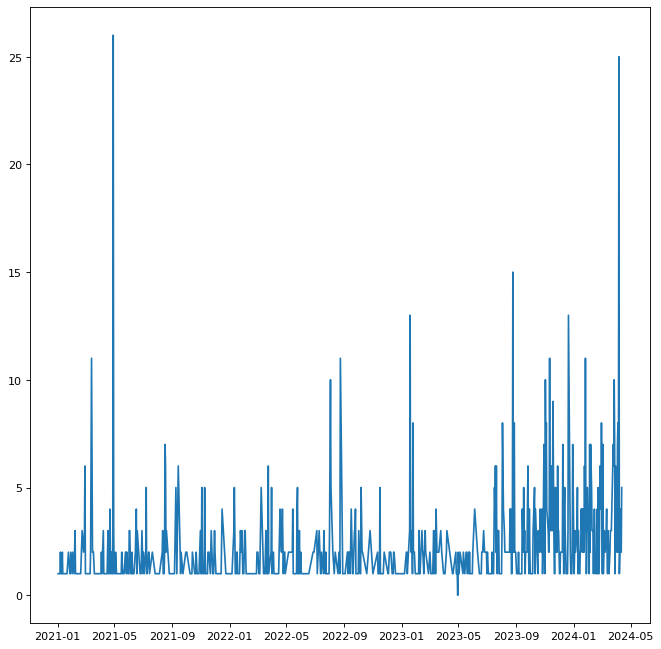

In [37]:
df_1 = df.groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

Количество просмотров

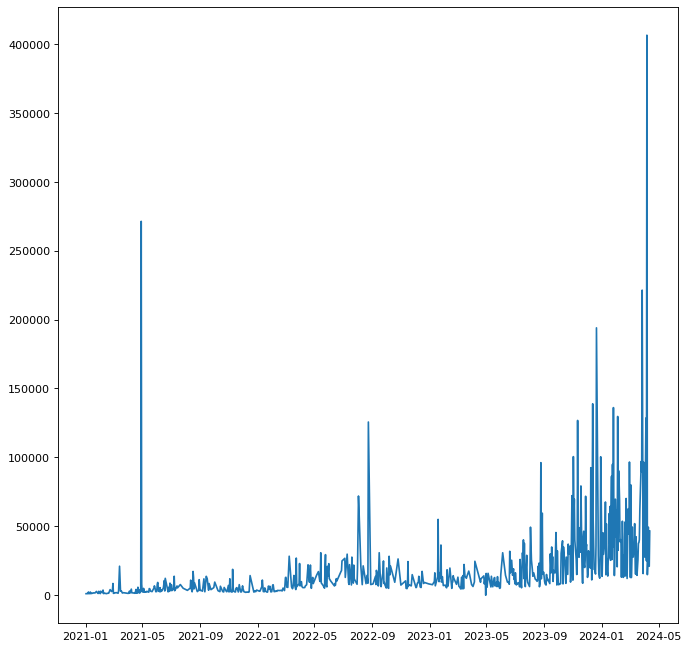

In [39]:
df_1 = df.groupby('date')['views'].sum()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

In [40]:
def spbu_or_msu(text):
    if pd.notna(text):
        pattern = re.compile(r'[Сс][Пп][Бб][Гг][Уу]|[Мм][Гг][Уу]|[Ss][Pp][Bb][Uu]|[Mm][Ss][Uu]|[Сс]анкт-[Пп]етербургский государственный университет|[Мм]осковский государственный университет')
        find_list = pattern.findall(text)
        list_to_write = []
        for i in find_list:
            if i[0].upper() == 'С' or i[0].upper() == 'S':
                list_to_write.append('СПбГУ')
            elif i[0].upper() == 'М' or i[0].upper() == 'M':
                list_to_write.append('МГУ')
        return list_to_write
    return []

Соотношение публикаций про МГУ И СПбГУ

<Axes: >

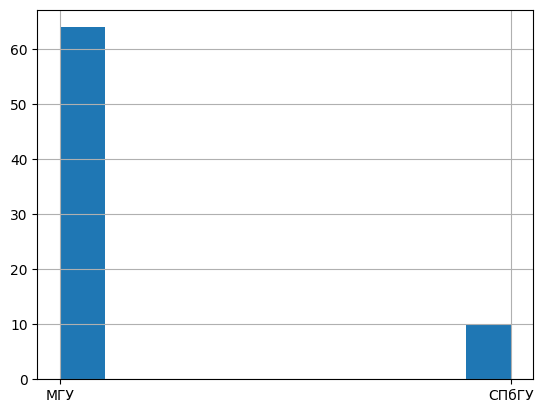

In [41]:
df['uni'] = df.message.apply(lambda x: spbu_or_msu(x))
df['uni'].explode().hist()

Количество публикаций

C:\Users\Viktor\AppData\Local\Temp\ipykernel_11072\2292648633.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df[df['uni'].explode() == 'СПбГУ'].groupby('date')['message'].count()


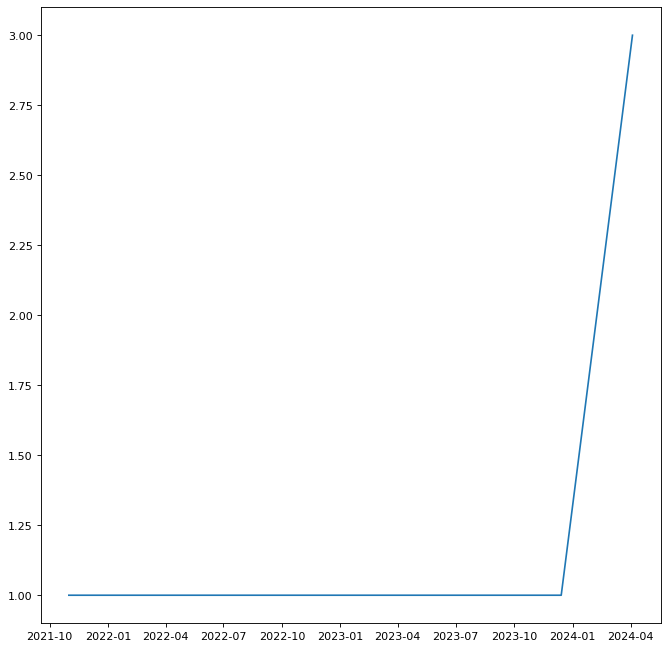

In [42]:
df_1 = df[df['uni'].explode() == 'СПбГУ'].groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

C:\Users\Viktor\AppData\Local\Temp\ipykernel_11072\2007624698.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df[df['uni'].explode() == 'МГУ'].groupby('date')['message'].count()


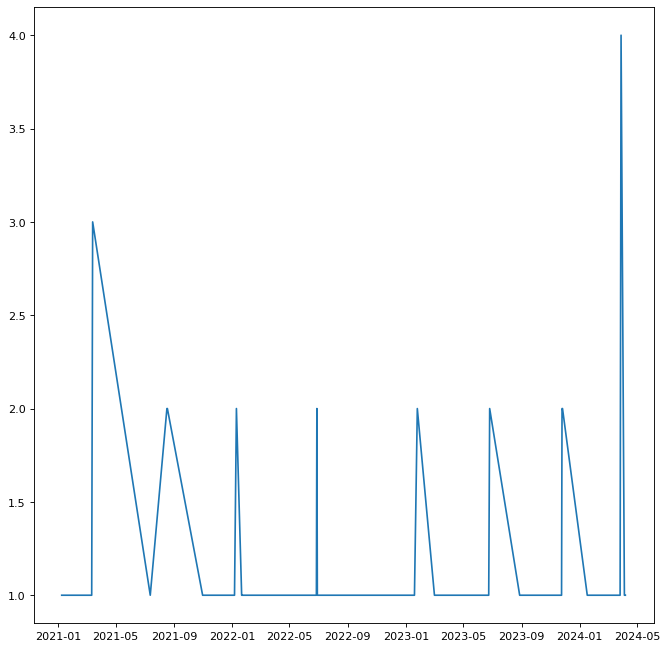

In [43]:
df_1 = df[df['uni'].explode() == 'МГУ'].groupby('date')['message'].count()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

Количество просмотров

C:\Users\Viktor\AppData\Local\Temp\ipykernel_11072\3754990629.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df[df['uni'].explode() == 'СПбГУ'].groupby('date')['views'].sum()


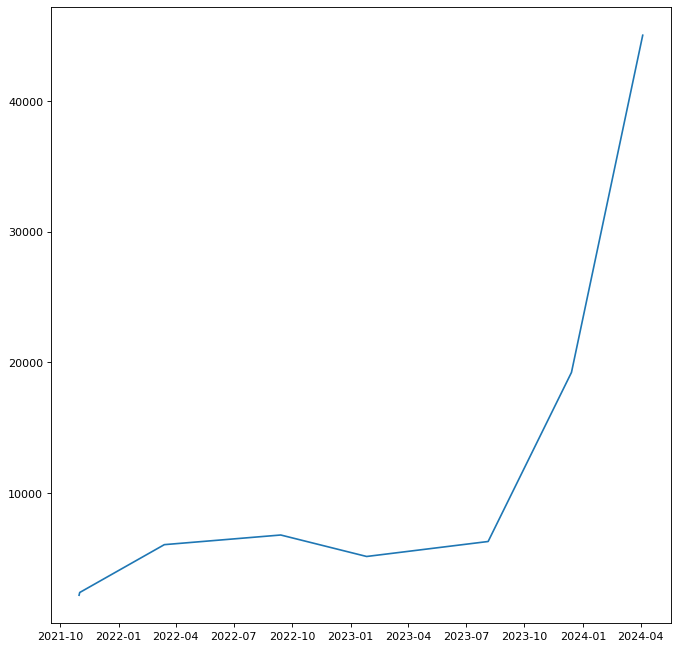

In [44]:
df_1 = df[df['uni'].explode() == 'СПбГУ'].groupby('date')['views'].sum()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)

C:\Users\Viktor\AppData\Local\Temp\ipykernel_11072\799868512.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df[df['uni'].explode() == 'МГУ'].groupby('date')['views'].sum()


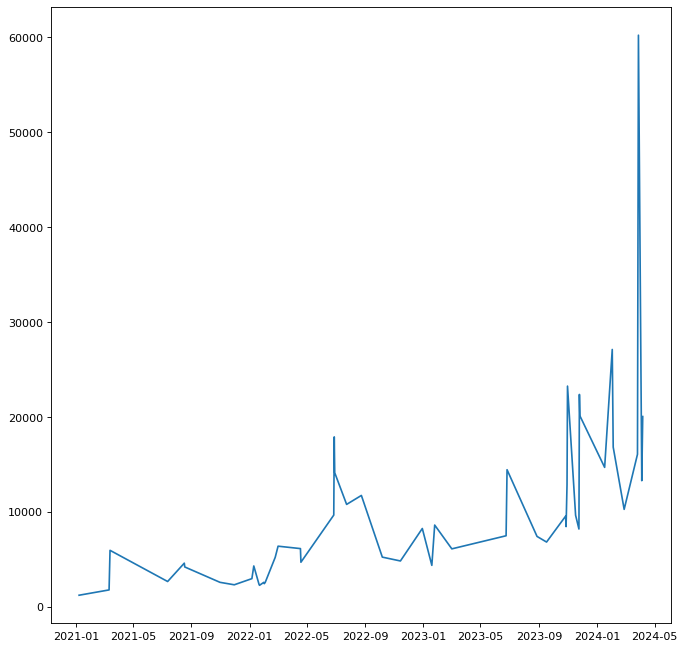

In [45]:
df_1 = df[df['uni'].explode() == 'МГУ'].groupby('date')['views'].sum()
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(df_1)